In [85]:
# Standard Packages
from torch.utils.data import random_split, DataLoader
import torch
import wandb
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import torch.nn as nn
# Custom Packages
from ssapp.data.AntennaDatasetLoaders import load_serialized_dataset
import ssapp.data.AntennaDatasetLoaders as AntennaDatasets
from ssapp.Utils import train_test_data_split
from ssapp.data.Metrics import relRMSE, relRMSE_pytorch
from ssapp.models.HelperFunctions import loadModel
from ssapp.models.NeuralNetworkModels.variational_autoencoder import VAE
##Settings
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
%load_ext autoreload
%autoreload 2


#model = loadModel(VAE(),'VAE_test.pt')
model=loadModel(VAE(),'VAE_test_circular_horn.pt')

model.double()




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/zhome/5b/b/127277/Supervised-Machine-Learning-for-Space-Antenna-Performance-Prediction/models/VAE_test_circular_horn.pt


VAE(
  (conv_encoder1): Conv2d(4, 32, kernel_size=(3, 11), stride=(1, 2), padding=(1, 10))
  (conv_encoder2): Conv2d(32, 128, kernel_size=(3, 11), stride=(2, 2))
  (fc_mu): Linear(in_features=11264, out_features=5, bias=True)
  (fc_std): Linear(in_features=11264, out_features=5, bias=True)
  (latent_to_linear): Linear(in_features=5, out_features=11264, bias=True)
  (conv_decoder1): ConvTranspose2d(128, 32, kernel_size=(3, 11), stride=(2, 2), output_padding=(0, 1))
  (conv_decoder2): ConvTranspose2d(32, 4, kernel_size=(3, 11), stride=(1, 2), padding=(1, 10))
  (activation): ReLU()
)

tensor([[0.4327, 0.1291]])
tensor([[ 1.6434,  3.5524, -3.4602,  0.5815, -3.1310]], dtype=torch.float64,
       grad_fn=<AddBackward0>)


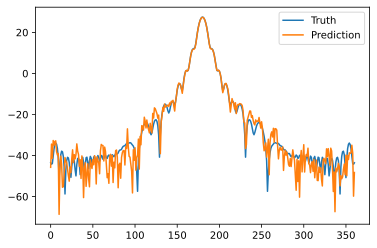

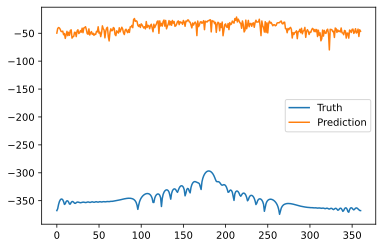

<Figure size 432x288 with 0 Axes>

In [86]:
import plotly.express as px
import plotly.graph_objects as go
AntennaDatasets.set_global_random_seed(42)
dataset = load_serialized_dataset('CircularHornDataset1_Val')
#dataset = load_serialized_dataset('PatchAntennaDataset2')

from ssapp.Utils import get_single_dataset_example

mag = lambda a,b: 20*np.log10(np.sqrt(a**2+b**2))
#mag = lambda a,b: (np.sqrt(a**2+b**2))
params, fields = get_single_dataset_example(dataset)
print(params)

pred = model(fields).detach()

plt.plot(mag(fields[0,:,0,0],fields[0,:,0,1]),label = 'Truth')
plt.plot(mag(pred[0,:,0,0],pred[0,:,0,1]),label = 'Prediction')
plt.legend()
plt.figure()
plt.plot(mag(fields[0,:,0,2],fields[0,:,0,3]),label = 'Truth')
plt.plot(mag(pred[0,:,0,2],pred[0,:,0,3]),label = 'Prediction')
plt.legend()
plt.figure()
print(model.var_encode_sample(fields))




fig = px.line(mag(fields[0,:,0,0],fields[0,:,0,1]),title = 'Prediction')

fig.show()

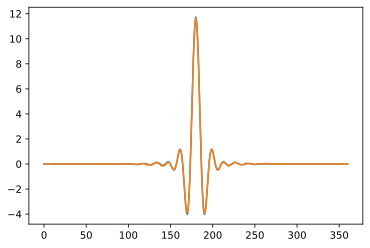

In [87]:
plt.plot(fields[0,:,0,0],label = 'Truth')
plt.plot(pred[0,:,0,0],label = 'Prediction')

torch.Size([1200, 5])
torch.Size([1200, 5])


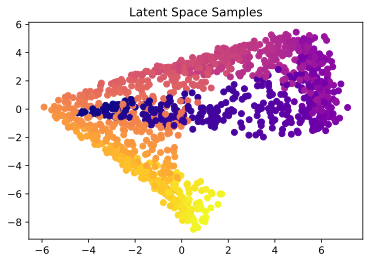

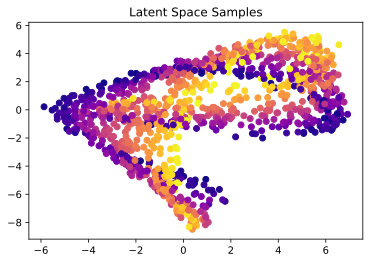

In [88]:
from torch.utils.data.dataloader import DataLoader

train_dataset = load_serialized_dataset('CircularHornDataset1_Train')
val_dataset =load_serialized_dataset('CircularHornDataset1_Val')

train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader = DataLoader(val_dataset, batch_size=len(val_dataset))




def plotVAELantet(param = 0):
    plt.figure()
    plt.title('Latent Space Samples')
    params, fields = next(iter(val_loader))
    p = model.var_encode_sample(fields)
    print(p.shape)
    p = p.detach()
    plt.scatter(p[:,0],p[:,1],c=params[:,param],cmap = 'plasma')


plotVAELantet(0)
plotVAELantet(1)






In [89]:


train_params, train_fields = next(iter(train_loader))
test_params, test_fields = next(iter(val_loader))
print(train_params.shape)
train_pred = model(train_fields)
test_pred = model(test_fields)

print('Relative RMSE Train',relRMSE_pytorch(train_pred, train_fields).item())
print('Relative RMSE Test',relRMSE_pytorch(test_pred, test_fields).item())

torch.Size([2800, 2])
Relative RMSE Train 0.026229753592993923
Relative RMSE Test 0.0257762701494098
